conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch

## Library Imports

In [3]:
import os
import warnings
import pickle
warnings.filterwarnings('ignore')

import torch
from torch.utils.data import SubsetRandomSampler

import numpy as np
%matplotlib inline

import bts.dataset as dataset
import bts.model as model
import bts.classifier as classifier
import bts.plot as plot

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Computation Details')
print(f'\tDevice Used: ({device})  {torch.cuda.get_device_name(torch.cuda.current_device())}\n')

print('Packages Used Versions:-')
print(f'\tPytorch Version: {torch.__version__}')

# To Start TensorBoard
# tensorboard --logdir logs --samples_per_plugin images=200

Computation Details
	Device Used: (cuda)  NVIDIA GeForce GTX 1650 with Max-Q Design

Packages Used Versions:-
	Pytorch Version: 1.9.1


## Hyperparameters Tuning 

In [4]:
# Dataset part used for testing
TEST_SPLIT = 0.2
# Batch size for training. Limited by GPU memory
BATCH_SIZE = 7
# Dataset folder used
DATASET_USED = 'png_dataset'
# Full Dataset path
DATASET_PATH = os.path.join('dataset',DATASET_USED)
# Training Epochs
EPOCHS = 100
# Filters used in UNet Model
FILTER_LIST = [16,32,64,128,256]
# Flag to train the model
TRAIN = True
# Flag to load saved model
LOAD_MODEL = False
# Flag to save model trained
SAVE_MODEL = True
# Model name to save or load.
MODEL_NAME = f"UNet-{FILTER_LIST}.pt"

print(f"Model Name :   {MODEL_NAME}")

Model Name :   UNet-[16, 32, 64, 128, 256].pt


## Dataset Loading

In [5]:
def get_indices(length, new=False):
    """ Gets the Training & Testing data indices for a
    paticular "DATASET_USED".Stores the indices and returns
    them back when the same dataset is used.
    Parameters:
        length(int): Length of the dataset used.
        new(bool): Discard the saved indices and get new ones.
    Return:
        train_indices(list): Array of indices used for training purpose.
        test_indices(list): Array of indices used for testing purpose.
    """
    # Pickle file location of the indices.
    file_path = os.path.join('dataset',f'split_indices_{DATASET_USED}.p')
    data = dict()
    if os.path.isfile(file_path) and not new:
        # File found.
        with open(file_path,'rb') as file :
            data = pickle.load(file)
            return data['train_indices'], data['test_indices']
    else:
        # File not found or fresh copy is required.
        #indices = list(range(length))
        #np.random.shuffle(indices)
        #split = int(np.floor(TEST_SPLIT * len(tumor_dataset)))
        train_indices =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 65, 70, 71, 72, 73, 74, 75, 76, 77, 78, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 238, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 289, 290, 291, 292, 296, 297, 298, 299, 300, 301, 302, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 
                          321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 361, 362, 363, 364, 365, 366, 367, 368, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 475, 476, 479, 480, 481, 482, 483, 484, 485, 486, 487, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 522, 523, 524, 525, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 585, 586, 587, 588, 589, 590, 591, 596, 597, 598, 599, 600, 601, 602, 603, 604, 607, 608, 609, 610, 
                          611, 612, 613, 614, 615, 616, 617, 618, 619, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 687, 688, 689, 690, 691, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 836, 837, 838, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 
                          903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 997, 998, 999, 1000, 1001, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1024, 1025, 1026, 1027, 1028, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1133, 1134, 1135, 1136, 1137, 1138, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 
                          1177, 1178, 1179, 1180, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1250, 1251, 1252, 1253, 1254, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 
                          1428, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1455, 1456, 1457, 1458, 1459, 1460, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1639, 1640, 1641, 1642, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 
                          1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 
                          1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 
                          2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2240, 2241, 2242, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 
                          2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2674, 2675, 2676, 2677, 2678, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 
                          2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2820, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2982, 
                          2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 3004, 3005, 3006, 3007, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062
]
        test_indices = [23, 24, 26, 33, 59, 60, 66, 67, 68, 69, 79, 80, 81, 82, 83, 84, 85, 131, 132, 133, 141, 142, 174, 175, 176, 177, 178, 179, 180, 181, 182, 197, 198, 235, 236, 237, 239, 240, 251, 285, 286, 287, 288, 293, 294, 295, 303, 304, 305, 306, 307, 308, 309, 356, 357, 358, 359, 360, 369, 370, 404, 405, 406, 407, 408, 409, 410, 411, 412, 429, 430, 473, 474, 477, 478, 488, 519, 520, 521, 526, 527, 528, 539, 540, 541, 583, 584, 592, 593, 594, 595, 605, 606, 620, 621, 622, 623, 663, 664, 665, 666, 667, 668, 669, 670, 671, 685, 686, 692, 693, 694, 724, 725, 726, 727, 763, 764, 765, 766, 808, 809, 810, 833, 834, 835, 839, 840, 841, 842, 856, 857, 887, 888, 889, 890, 932, 933, 934, 935, 936, 937, 949, 950, 951, 952, 953, 993, 994, 995, 996, 1002, 1003, 1004, 1020, 1021, 1022, 1023, 1029, 1030, 1031, 1032, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1064, 1065, 1066, 1067, 1068, 1128, 1129, 1130, 1131, 1132, 1139, 1140, 1141, 1142, 1160, 1161, 1162, 1163, 1164, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1197, 1198, 1199, 1200, 1201, 1245, 1246, 1247, 1248, 1249, 1255, 1256, 1257, 1258, 1259, 1278, 1279, 1280, 1281, 1282, 1283, 1325, 1326, 1327, 1328, 1373, 1374, 1375, 1376, 1377, 1378, 1409, 1410, 1411, 1412, 1429, 1430, 1431, 1432, 1433, 1446, 1447, 
                        1448, 1449, 1450, 1451, 1452, 1453, 1454, 1461, 1462, 1463, 1464, 1465, 1466, 1514, 1515, 1516, 1517, 1518, 1519, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1595, 1596, 1597, 1598, 1615, 1616, 1617, 1618, 1619, 1633, 1634, 1635, 1636, 1637, 1638, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1703, 1704, 1705, 1706, 1707, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1788, 1789, 1790, 1791, 1792, 1793, 1812, 1813, 1814, 1815, 1816, 1817, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1878, 1879, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 2031, 2032, 2033, 2034, 2035, 2036, 2060, 2061, 2062, 2063, 2086, 2087, 2088, 2089, 2090, 2091, 2099, 2100, 2101, 2102, 2127, 2128, 2129, 2130, 2131, 2132, 2143, 2144, 2236, 2237, 2238, 2239, 2243, 2244, 2245, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2310, 2311, 2312, 2313, 2314, 2315, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2539, 2540, 
                        2541, 2542, 2543, 2544, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2588, 2589, 2590, 2591, 2592, 2593, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2679, 2680, 2737, 2738, 2739, 2740, 2741, 2749, 2750, 2751, 2816, 2817, 2818, 2819, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2853, 2854, 2855, 2856, 2884, 2885, 2886, 2887, 2888, 2889, 2899, 2900, 2901, 2902, 2903, 2904, 2943, 2944, 2945, 2946, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2998, 2999, 3000, 3001, 3002, 3003, 3008, 3009, 3010, 3011, 3012, 3063
]
        # Indices are saved with pickle.
        data['train_indices'] = train_indices
        data['test_indices'] = test_indices
        with open(file_path,'wb') as file:
            pickle.dump(data,file)
    return train_indices, test_indices

In [6]:
tumor_dataset = dataset.TumorDataset(DATASET_PATH)

train_indices, test_indices = get_indices(len(tumor_dataset))
train_sampler, test_sampler = SubsetRandomSampler(train_indices), SubsetRandomSampler(test_indices)
print("Los que se van a testear: ", test_indices)

print("Los que se van a entrenar:",train_indices)
trainloader = torch.utils.data.DataLoader(tumor_dataset, BATCH_SIZE, sampler=train_sampler)
testloader = torch.utils.data.DataLoader(tumor_dataset, 1, sampler=test_sampler)

Los que se van a testear:  [23, 24, 26, 33, 59, 60, 66, 67, 68, 69, 79, 80, 81, 82, 83, 84, 85, 131, 132, 133, 141, 142, 174, 175, 176, 177, 178, 179, 180, 181, 182, 197, 198, 235, 236, 237, 239, 240, 251, 285, 286, 287, 288, 293, 294, 295, 303, 304, 305, 306, 307, 308, 309, 356, 357, 358, 359, 360, 369, 370, 404, 405, 406, 407, 408, 409, 410, 411, 412, 429, 430, 473, 474, 477, 478, 488, 519, 520, 521, 526, 527, 528, 539, 540, 541, 583, 584, 592, 593, 594, 595, 605, 606, 620, 621, 622, 623, 663, 664, 665, 666, 667, 668, 669, 670, 671, 685, 686, 692, 693, 694, 724, 725, 726, 727, 763, 764, 765, 766, 808, 809, 810, 833, 834, 835, 839, 840, 841, 842, 856, 857, 887, 888, 889, 890, 932, 933, 934, 935, 936, 937, 949, 950, 951, 952, 953, 993, 994, 995, 996, 1002, 1003, 1004, 1020, 1021, 1022, 1023, 1029, 1030, 1031, 1032, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1064, 1065, 1066, 1067, 1068, 1128, 1129, 1130, 1131, 1132, 1139, 1140, 1141, 1142, 1160, 1161, 1162, 1163, 1164, 1181, 1182, 1183,

## Model Declaration

In [7]:
unet_model = None
unet_classifier = None
if not LOAD_MODEL:
    # New model is created.
    unet_model = model.DynamicUNet(FILTER_LIST).to(device)
    unet_classifier = classifier.BrainTumorClassifier(unet_model,device)
else:
    # Saved model is loaded on memory.
    unet_model = model.DynamicUNet(FILTER_LIST)
    unet_classifier = classifier.BrainTumorClassifier(unet_model,device)
    unet_classifier.restore_model(os.path.join('saved_models',MODEL_NAME))
    print('Saved model loaded')

#### Uncomment this section if visualization of training progress is required on Tensorboard

In [17]:
"""
till = 8
choice = test_indices[:till]
sample = list()
for _ in range(till):
    sample.append(dataset[choice[_]])
"""

TypeError: 'module' object is not subscriptable

## Model Training

In [14]:
# Training process
if TRAIN:
    unet_model.train()
    path = os.path.join('saved_models',MODEL_NAME) if SAVE_MODEL else None
    unet_train_history = unet_classifier.train(EPOCHS,trainloader,mini_batch=100,save_best=path)
    print(f'Training Finished after {EPOCHS} epoches')

# Testing process on test data.
unet_model.eval()
unet_score = unet_classifier.test(testloader)
print(f'\n\nDice Score {unet_score}')
# Dice Score 0.7446110107881675

Starting Training Process
    Batch: 100,	Batch Loss: 0.1596267
    Batch: 200,	Batch Loss: 0.1441303
    Batch: 300,	Batch Loss: 0.1420335
Epoch: 001,  Loss:0.1475464,  Time:237.01secs	Saved at loss: 0.1475464245
    Batch: 100,	Batch Loss: 0.1359508
    Batch: 200,	Batch Loss: 0.1280558
    Batch: 300,	Batch Loss: 0.1261549
Epoch: 002,  Loss:0.1293063,  Time:232.29secs	Saved at loss: 0.1293062757
    Batch: 100,	Batch Loss: 0.1251584
    Batch: 200,	Batch Loss: 0.1172144
    Batch: 300,	Batch Loss: 0.1143140
Epoch: 003,  Loss:0.1189514,  Time:233.56secs	Saved at loss: 0.1189514191
    Batch: 100,	Batch Loss: 0.1166556
    Batch: 200,	Batch Loss: 0.1145991
    Batch: 300,	Batch Loss: 0.1078826
Epoch: 004,  Loss:0.1113326,  Time:229.18secs	Saved at loss: 0.1113326323
    Batch: 100,	Batch Loss: 0.1070707
    Batch: 200,	Batch Loss: 0.1028348
    Batch: 300,	Batch Loss: 0.1008903
Epoch: 005,  Loss:0.1027733,  Time:231.46secs	Saved at loss: 0.1027732844
    Batch: 100,	Batch Loss: 0.1002

    Batch: 200,	Batch Loss: 0.0496066
    Batch: 300,	Batch Loss: 0.0503278
Epoch: 046,  Loss:0.0501678,  Time:231.75secs	Saved at loss: 0.0501678043
    Batch: 100,	Batch Loss: 0.0531746
    Batch: 200,	Batch Loss: 0.0511476
    Batch: 300,	Batch Loss: 0.0487072
Epoch: 047,  Loss:0.0510519,  Time:232.94secs
    Batch: 100,	Batch Loss: 0.0485840
    Batch: 200,	Batch Loss: 0.0515398
    Batch: 300,	Batch Loss: 0.0525270
Epoch: 048,  Loss:0.0502856,  Time:231.34secs
    Batch: 100,	Batch Loss: 0.0511134
    Batch: 200,	Batch Loss: 0.0469091
    Batch: 300,	Batch Loss: 0.0509662
Epoch: 049,  Loss:0.0493127,  Time:234.11secs	Saved at loss: 0.0493127349
    Batch: 100,	Batch Loss: 0.0490512
    Batch: 200,	Batch Loss: 0.0488243
    Batch: 300,	Batch Loss: 0.0481212
Epoch: 050,  Loss:0.0488839,  Time:226.25secs	Saved at loss: 0.0488839412
    Batch: 100,	Batch Loss: 0.0467154
    Batch: 200,	Batch Loss: 0.0498204
    Batch: 300,	Batch Loss: 0.0494511
Epoch: 051,  Loss:0.0484572,  Time:226.4

    Batch: 100,	Batch Loss: 0.0357733
    Batch: 200,	Batch Loss: 0.0387050
    Batch: 300,	Batch Loss: 0.0363480
Epoch: 092,  Loss:0.0367899,  Time:225.70secs	Saved at loss: 0.0367899210
    Batch: 100,	Batch Loss: 0.0384163
    Batch: 200,	Batch Loss: 0.0380685
    Batch: 300,	Batch Loss: 0.0356791
Epoch: 093,  Loss:0.0368324,  Time:225.69secs
    Batch: 100,	Batch Loss: 0.0380797
    Batch: 200,	Batch Loss: 0.0374801
    Batch: 300,	Batch Loss: 0.0350061
Epoch: 094,  Loss:0.0369827,  Time:225.30secs
    Batch: 100,	Batch Loss: 0.0365551
    Batch: 200,	Batch Loss: 0.0385685
    Batch: 300,	Batch Loss: 0.0365514
Epoch    95: reducing learning rate of group 0 to 3.7715e-04.
Epoch: 095,  Loss:0.0370751,  Time:225.26secs
    Batch: 100,	Batch Loss: 0.0355728
    Batch: 200,	Batch Loss: 0.0361292
    Batch: 300,	Batch Loss: 0.0356047
Epoch: 096,  Loss:0.0355452,  Time:224.96secs	Saved at loss: 0.0355451599
    Batch: 100,	Batch Loss: 0.0372940
    Batch: 200,	Batch Loss: 0.0340303
    Ba

FileNotFoundError: [Errno 2] No such file or directory: 'dataset\\png_dataset\\3064.png'

## Training Results

### Training Loss Graph

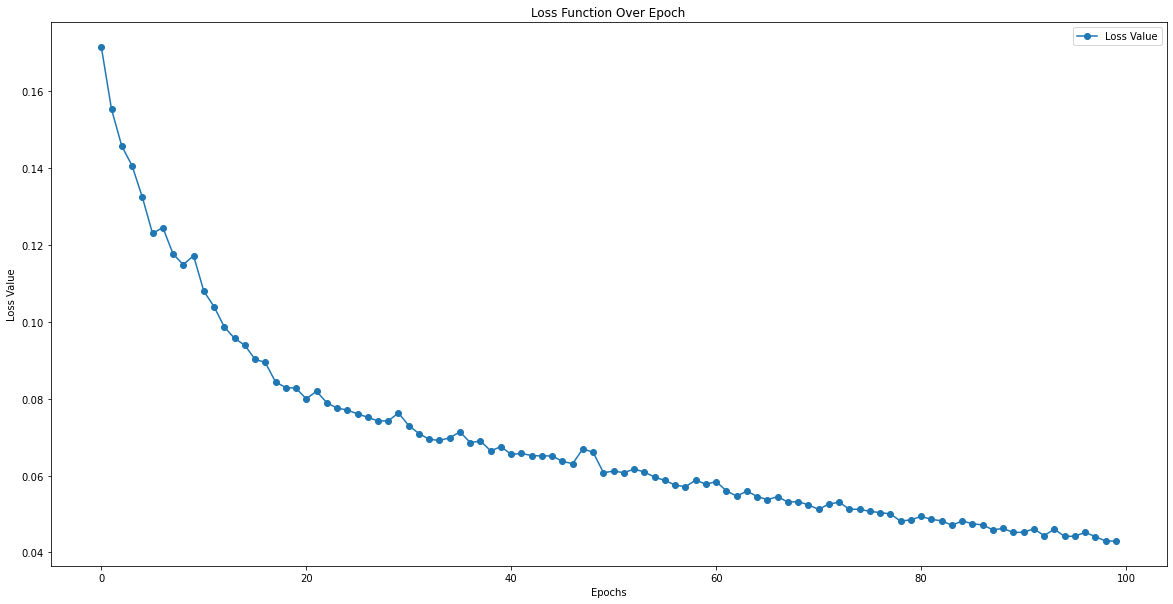

In [20]:
save_plot = os.path.join('images',f'{MODEL_NAME}-loss_graph.png')
plot.loss_graph(unet_train_history['train_loss'],save_plot)

### Visualize Test Dataset Predictions
Run the 2nd cell to get new predictions of different data

In [31]:
i=11

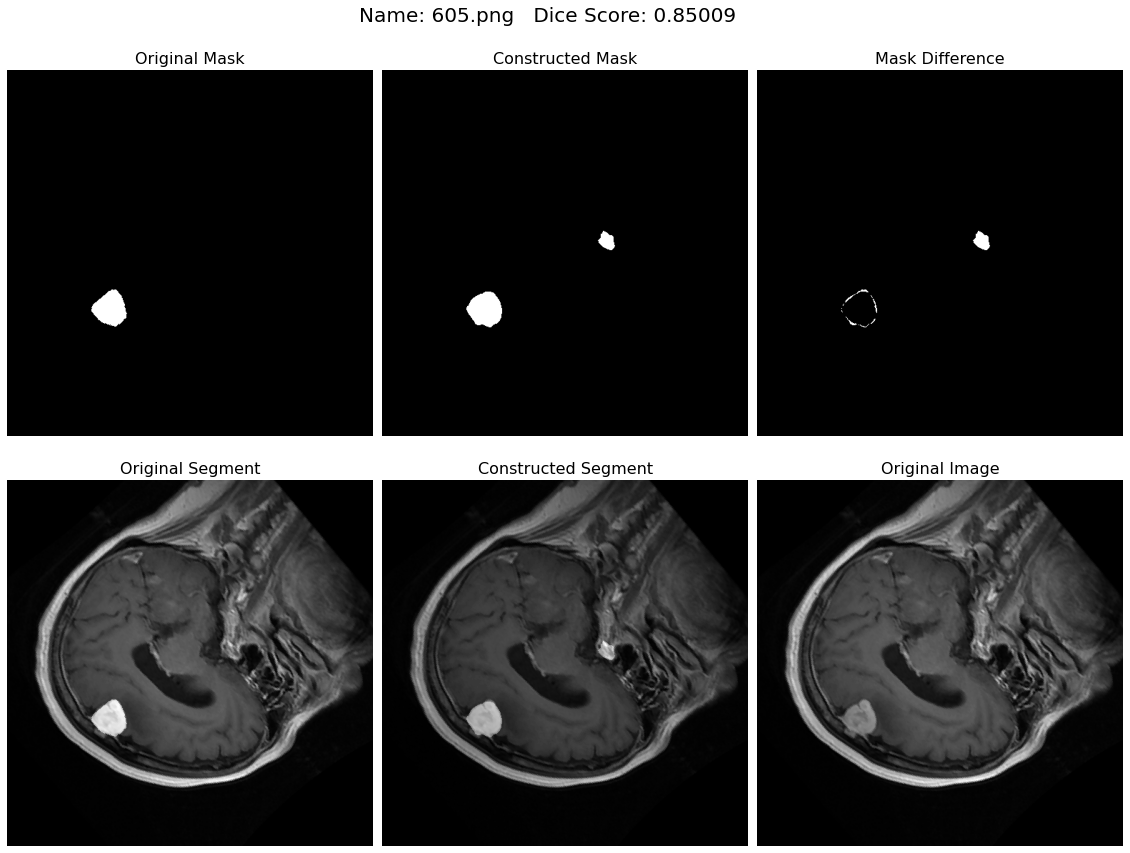

In [32]:
# Run this cell repeatedly to see some results.
image_index = test_indices[i]
sample = tumor_dataset[image_index]
image, mask, output, d_score = unet_classifier.predict(sample,0.65)
title = f'Name: {image_index}.png   Dice Score: {d_score:.5f}'
# save_path = os.path.join('images',f'{d_score:.5f}_{image_index}.png')
plot.result(image,mask,output,title,save_path=None)
i += 1
if i >= len(test_indices):
    i = 0 